In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

In [2]:
car_price = pd.read_csv("CarPrice.csv")

In [3]:
car_price.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


1. Engine Size and Price

In [4]:
car_price['enginesize'].isna().sum()

0

In [5]:
car_price['price'].isna().sum()

0

In [6]:
x = car_price[['enginesize']]
y = car_price[['price']]

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [8]:
x_train

,enginesize
66,134
111,120
153,92
96,97
38,110
...,...
106,181
14,164
92,97
179,171


In [9]:
x_test

,enginesize
15,209
9,131
100,120
132,121
68,183
95,97
159,110
162,98
147,108
182,97


In [10]:
y_test.values

array([[30760.   ],
       [17859.167],
       [ 9549.   ],
       [11850.   ],
       [28248.   ],
       [ 7799.   ],
       [ 7788.   ],
       [ 9258.   ],
       [10198.   ],
       [ 7775.   ],
       [13295.   ],
       [ 8238.   ],
       [18280.   ],
       [ 9988.   ],
       [40960.   ],
       [ 6488.   ],
       [ 5151.   ],
       [12629.   ],
       [ 8189.   ],
       [ 9960.   ],
       [ 8495.   ],
       [13499.   ],
       [ 8249.   ],
       [ 6479.   ],
       [ 6692.   ],
       [41315.   ],
       [ 9639.   ],
       [13415.   ],
       [ 7999.   ],
       [12940.   ],
       [25552.   ],
       [ 6229.   ],
       [ 7898.   ],
       [21485.   ],
       [ 7689.   ],
       [28176.   ],
       [11259.   ],
       [10945.   ],
       [ 8916.5  ],
       [14489.   ],
       [ 7463.   ]])

In [11]:
lr = LinearRegression()

In [12]:
lr.fit(x_train,y_train)

LinearRegression()

In [13]:
lr.coef_

array([[165.84456256]])

In [14]:
lr.intercept_

array([-7741.76506717])

In [15]:
y_pred = lr.predict(x_test)
y_pred

array([[26919.74850809],
       [13983.87262833],
       [12159.58244016],
       [12325.42700272],
       [22607.7898815 ],
       [ 8345.15750125],
       [10501.13681455],
       [ 8511.00206381],
       [10169.44768942],
       [ 8345.15750125],
       [14813.09544113],
       [ 8511.00206381],
       [15476.47369138],
       [12491.27156528],
       [43338.36020163],
       [ 7515.93468845],
       [ 2374.75324906],
       [18129.98669235],
       [12491.27156528],
       [10169.44768942],
       [12491.27156528],
       [22276.10075638],
       [ 8345.15750125],
       [ 7515.93468845],
       [ 7184.24556333],
       [26919.74850809],
       [16471.54106674],
       [15642.31825394],
       [ 8345.15750125],
       [15642.31825394],
       [22607.7898815 ],
       [ 7184.24556333],
       [ 7515.93468845],
       [20949.34425589],
       [ 8511.00206381],
       [22607.7898815 ],
       [10169.44768942],
       [ 3867.35431211],
       [ 7184.24556333],
       [18129.98669235],


In [16]:
mse = mean_squared_error(y_pred, y_test)
mse

15465458.965908466

In [17]:
r2_score = r2_score(y_pred, y_test)
r2_score

0.7338146014506948

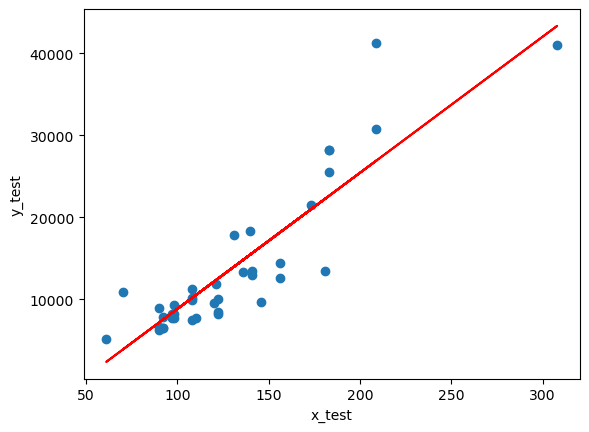

In [18]:
plt.scatter(x_test, y_test)
plt.xlabel('x_test')
plt.ylabel('y_test')
plt.plot(x_test,y_pred, c='r')

2. Citympg and Highwaympgwer

In [19]:
car_price['citympg'].isna().sum()

0

In [20]:
car_price['highwaympg'].isna().sum()

0

In [21]:
x = car_price[['citympg']]
y = car_price[['highwaympg']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [22]:
x_train

,citympg
66,31
111,19
153,31
96,31
38,27
...,...
106,19
14,20
92,31
179,19


In [23]:
y_train

,highwaympg
66,39
111,24
153,37
96,37
38,33
...,...
106,25
14,25
92,37
179,24


In [24]:
y_test.values

array([[22],
       [22],
       [34],
       [28],
       [25],
       [37],
       [47],
       [34],
       [31],
       [46],
       [24],
       [34],
       [27],
       [32],
       [16],
       [38],
       [53],
       [24],
       [32],
       [32],
       [32],
       [22],
       [37],
       [54],
       [38],
       [22],
       [30],
       [28],
       [37],
       [28],
       [25],
       [38],
       [32],
       [23],
       [30],
       [25],
       [29],
       [23],
       [43],
       [24],
       [32]], dtype=int64)

In [25]:
lr = LinearRegression()

In [26]:
lr.fit(x_train,y_train)

LinearRegression()

In [27]:
lr.coef_

array([[1.00710236]])

In [28]:
lr.intercept_

array([5.32192126])

In [29]:
y_pred = lr.predict(x_test)
y_pred

array([[21.43555906],
       [21.43555906],
       [32.51368504],
       [26.47107087],
       [27.47817323],
       [36.54209449],
       [43.59181102],
       [33.5207874 ],
       [30.49948031],
       [42.58470866],
       [24.45686614],
       [34.52788976],
       [24.45686614],
       [32.51368504],
       [19.42135433],
       [36.54209449],
       [52.65573228],
       [24.45686614],
       [30.49948031],
       [31.50658268],
       [31.50658268],
       [22.44266142],
       [36.54209449],
       [54.66993701],
       [36.54209449],
       [21.43555906],
       [29.49237795],
       [28.48527559],
       [36.54209449],
       [28.48527559],
       [27.47817323],
       [36.54209449],
       [32.51368504],
       [23.44976378],
       [29.49237795],
       [27.47817323],
       [29.49237795],
       [22.44266142],
       [43.59181102],
       [24.45686614],
       [33.5207874 ]])

In [30]:
mse = mean_squared_error(y_pred, y_test)
mse

2.0049872441005374

In [31]:
r2_score = r2_score(y_pred, y_test)
r2_score

TypeError: 'numpy.float64' object is not callable

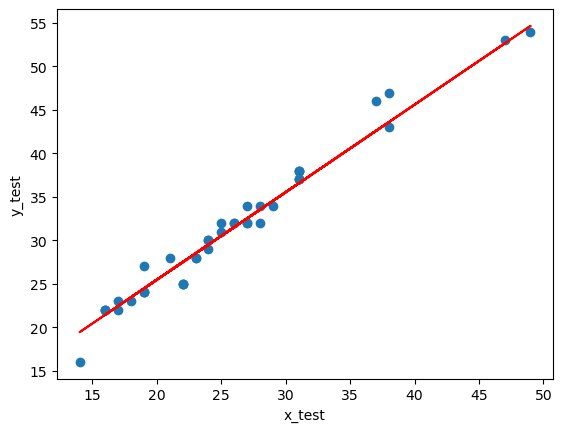

In [32]:
plt.scatter(x_test, y_test)
plt.xlabel('x_test')
plt.ylabel('y_test')
plt.plot(x_test,y_pred, c='r')

3. Horsepower and Peakrpm

In [33]:
car_price['horsepower'].isna().sum()

0

In [34]:
car_price['peakrpm'].isna().sum()

0

In [35]:
x = car_price[['horsepower']]
y = car_price[['peakrpm']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [36]:
x_train

,horsepower
66,72
111,95
153,62
96,69
38,86
...,...
106,160
14,121
92,69
179,161


In [37]:
y_test.values

array([[5400],
       [5500],
       [5200],
       [5250],
       [4350],
       [5200],
       [4500],
       [4800],
       [5200],
       [4800],
       [5500],
       [4800],
       [5000],
       [4200],
       [4500],
       [4800],
       [5100],
       [5000],
       [5000],
       [5200],
       [4800],
       [5200],
       [5200],
       [4800],
       [5500],
       [5400],
       [4800],
       [5400],
       [5200],
       [5400],
       [4350],
       [5500],
       [4800],
       [5500],
       [5500],
       [4350],
       [4800],
       [6000],
       [5400],
       [5000],
       [4800]], dtype=int64)

In [38]:
lr = LinearRegression()

In [39]:
lr.fit(x_train,y_train)

LinearRegression()

In [40]:
lr.coef_

array([[1.65938374]])

In [41]:
lr.intercept_

array([4970.46781591])

In [42]:
y_pred = lr.predict(x_test)
y_pred

array([[5272.47565649],
       [5235.96921423],
       [5131.42803864],
       [5153.00002725],
       [5174.57201587],
       [5084.96529394],
       [5063.39330532],
       [5086.62467768],
       [5126.44988742],
       [5056.75577036],
       [5153.00002725],
       [5086.62467768],
       [5169.59386465],
       [5123.13111994],
       [5275.79442397],
       [5073.34960776],
       [5050.11823541],
       [5211.07845813],
       [5116.49358499],
       [5126.44988742],
       [5109.85605003],
       [5222.69414431],
       [5084.96529394],
       [5066.7120728 ],
       [5083.3059102 ],
       [5272.47565649],
       [5162.95632969],
       [5159.63756221],
       [5084.96529394],
       [5159.63756221],
       [5174.57201587],
       [5083.3059102 ],
       [5073.34960776],
       [5192.825237  ],
       [5139.72495734],
       [5174.57201587],
       [5154.65941099],
       [5138.0655736 ],
       [5086.62467768],
       [5211.07845813],
       [5106.53728255]])

In [43]:
mse = mean_squared_error(y_pred, y_test)
mse

162422.565978427

In [44]:
r2_score = r2_score(y_pred, y_test)
r2_score

TypeError: 'numpy.float64' object is not callable

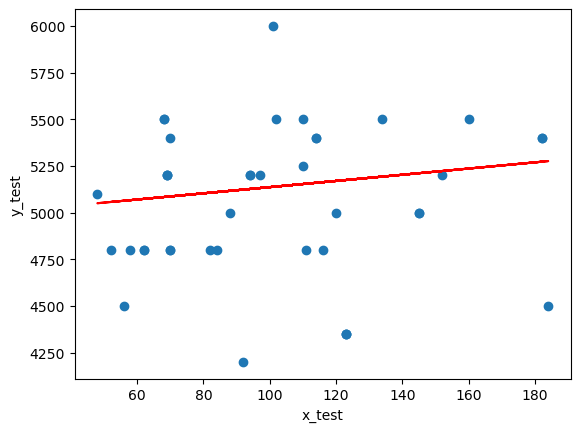

In [45]:
plt.scatter(x_test, y_test)
plt.xlabel('x_test')
plt.ylabel('y_test')
plt.plot(x_test,y_pred, c='r')

4. Boreration and Stroke

In [46]:
car_price['boreratio'].isna().sum()

0

In [47]:
car_price['boreratio'] = car_price['boreratio'].fillna(car_price['boreratio'].mean())

In [48]:
car_price['stroke'].isna().sum()

0

In [49]:
car_price['stroke'] = car_price['stroke'].fillna(car_price['stroke'].mean())

In [50]:
x = car_price[['boreratio']]
y = car_price[['stroke']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [51]:
x_train

,boreratio
66,3.43
111,3.46
153,3.05
96,3.15
38,3.15
...,...
106,3.43
14,3.31
92,3.15
179,3.27


In [52]:
lr = LinearRegression()

In [53]:
lr.fit(x_train,y_train)

LinearRegression()

In [54]:
lr.coef_

array([[-0.07616178]])

In [55]:
lr.intercept_

array([3.50783067])

In [56]:
y_pred = lr.predict(x_test)
y_pred

array([[3.23212502],
       [3.26944429],
       [3.25421193],
       [3.23821796],
       [3.23517149],
       [3.26792106],
       [3.25878164],
       [3.26487458],
       [3.23212502],
       [3.27858371],
       [3.26487458],
       [3.26487458],
       [3.22146237],
       [3.25573517],
       [3.2184159 ],
       [3.27553723],
       [3.28619988],
       [3.23517149],
       [3.2526887 ],
       [3.23212502],
       [3.24964223],
       [3.24659576],
       [3.26792106],
       [3.28619988],
       [3.28163018],
       [3.23212502],
       [3.23212502],
       [3.21993913],
       [3.26792106],
       [3.21993913],
       [3.23517149],
       [3.28163018],
       [3.27553723],
       [3.23517149],
       [3.27706047],
       [3.23517149],
       [3.23212502],
       [3.25421193],
       [3.27706047],
       [3.23440987],
       [3.23212502]])

In [57]:
mse = mean_squared_error(y_pred, y_test)
mse

0.08776353863681016

In [58]:
r2_score = r2_score(y_pred, y_test)
r2_score

TypeError: 'numpy.float64' object is not callable

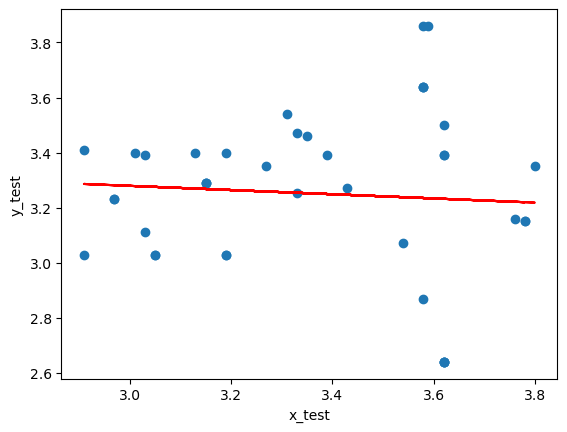

In [59]:
plt.scatter(x_test, y_test)
plt.xlabel('x_test')
plt.ylabel('y_test')
plt.plot(x_test,y_pred, c='r')

In [60]:
x = car_price[['enginesize', 'wheelbase']]
y = car_price[['price','horsepower']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [61]:
car_price['wheelbase'].isna().sum()

0

In [62]:
car_price['wheelbase'] = car_price['wheelbase'].fillna(car_price['wheelbase'].mean())

In [63]:
x_train

,enginesize,wheelbase
66,134,104.9
111,120,107.9
153,92,95.7
96,97,94.5
38,110,96.5
...,...,...
106,181,99.2
14,164,103.5
92,97,94.5
179,171,102.9


In [64]:
y_train

,price,horsepower
66,18344.0,72
111,15580.0,95
153,6918.0,62
96,7499.0,69
38,9095.0,86
...,...,...
106,18399.0,160
14,24565.0,121
92,6849.0,69
179,15998.0,161


In [65]:
y_test.values

array([[30760.   ,   182.   ],
       [17859.167,   160.   ],
       [ 9549.   ,    97.   ],
       [11850.   ,   110.   ],
       [28248.   ,   123.   ],
       [ 7799.   ,    69.   ],
       [ 7788.   ,    56.   ],
       [ 9258.   ,    70.   ],
       [10198.   ,    94.   ],
       [ 7775.   ,    52.   ],
       [13295.   ,   110.   ],
       [ 8238.   ,    70.   ],
       [18280.   ,   120.   ],
       [ 9988.   ,    92.   ],
       [40960.   ,   184.   ],
       [ 6488.   ,    62.   ],
       [ 5151.   ,    48.   ],
       [12629.   ,   145.   ],
       [ 8189.   ,    88.   ],
       [ 9960.   ,    94.   ],
       [ 8495.   ,    84.   ],
       [13499.   ,   152.   ],
       [ 8249.   ,    69.   ],
       [ 6479.   ,    58.   ],
       [ 6692.   ,    68.   ],
       [41315.   ,   182.   ],
       [ 9639.   ,   116.   ],
       [13415.   ,   114.   ],
       [ 7999.   ,    69.   ],
       [12940.   ,   114.   ],
       [25552.   ,   123.   ],
       [ 6229.   ,    68.   ],
       [

In [66]:
lr = LinearRegression()

In [67]:
lr.fit(x_train, y_train)

LinearRegression()

In [68]:
lr.coef_

array([[155.18264252, 150.09366241],
       [  0.86958257,  -0.98430463]])

In [69]:
lr.intercept_

array([-21212.48829052,     91.95233255])

In [70]:
y_pred = lr.predict(x_test)
y_pred

array([[26755.37805558,   171.81956108],
       [14050.75728945,   107.92933878],
       [11998.53279819,   100.62783112],
       [12438.89339929,    99.62723489],
       [23696.23815576,   142.81243401],
       [ 8024.07913174,    83.28505441],
       [10221.56587938,    93.40846232],
       [ 8359.37416915,    82.97347142],
       [10106.32235548,    90.38970115],
       [ 8444.34138649,    80.52900143],
       [14961.75479821,   111.39137748],
       [ 8179.26177426,    84.15463698],
       [16257.90684914,   110.44033693],
       [13089.38512777,    97.24861217],
       [44730.08939093,   240.78133535],
       [ 7428.27831404,    77.75597597],
       [ 1521.93266034,    57.98433998],
       [17389.98616774,   133.21239983],
       [12173.81378706,   103.25287044],
       [10136.34108796,    90.19284022],
       [12549.04794309,   100.79210885],
       [21944.97371157,   150.52259335],
       [ 8114.13532919,    82.69447163],
       [ 6062.42598609,    86.71314814],
       [ 6817.72

In [71]:
mse = mean_squared_error(y_pred, y_test)
mse

7437842.531875372

In [72]:
r2_score = r2_score(y_pred, y_test)
r2_score

TypeError: 'numpy.float64' object is not callable

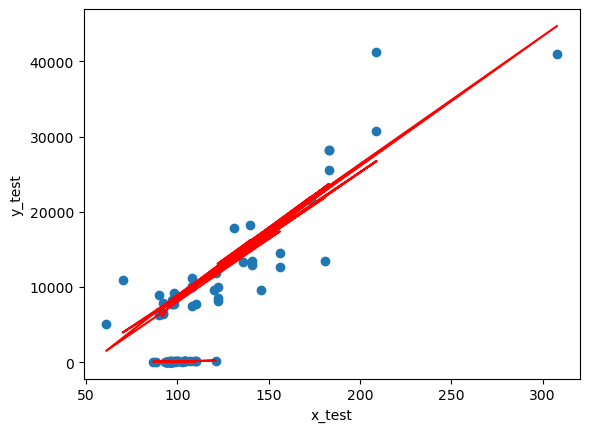

In [73]:
plt.scatter(x_test, y_test)
plt.xlabel('x_test')
plt.ylabel('y_test')
plt.plot(x_test,y_pred, c='r')